# Problem Statement

Wine Quality Prediction-
Here, we will apply a method of assessing wine quality using a decision tree, and test it against the wine-quality dataset from the UC Irvine Machine Learning Repository.



The wine dataset is a classic and very easy multi-class classification dataset.
Find more about data here - https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

# Q1. Load the Wine Data file into Python DataFrame. 


Let us assume the data frame is named wine_df


In [1]:
#Import all the necessary modules

from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
wine_df=pd.read_csv("winequality-red.csv")
wine_df

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
5               7.4             0.660         0.00             1.8      0.075   
6               7.9             0.600         0.06             1.6      0.069   
7               7.3             0.650         0.00             1.2      0.065   
8               7.8             0.580         0.02             2.0      0.073   
9               7.5             0.500         0.36             6.1      0.071   
10              6.7             0.580         0.08             1.8      0.097   
11              7.5             0.500         0.36             6.1      0.071   
12              5.6             0.615         0.00             1.6      0.089   
13              7.8             0.610         0.29             1.6      0.114   
14              8.9             0.620         0.18             3.8      0.176   
15              8.9             0.620         0.19             3.9      0.170   
16              8.5             0.280         0.56             1.8      0.092   
17              8.1             0.560         0.28             1.7      0.368   
18              7.4             0.590         0.08             4.4      0.086   
19              7.9             0.320         0.51             1.8      0.341   
20              8.9             0.220         0.48             1.8      0.077   
21              7.6             0.390         0.31             2.3      0.082   
22              7.9             0.430         0.21             1.6      0.106   
23              8.5             0.490         0.11             2.3      0.084   
24              6.9             0.400         0.14             2.4      0.085   
25              6.3             0.390         0.16             1.4      0.080   
26              7.6             0.410         0.24             1.8      0.080   
27              7.9             0.430         0.21             1.6      0.106   
28              7.1             0.710         0.00             1.9      0.080   
29              7.8             0.645         0.00             2.0      0.082   
...             ...               ...          ...             ...        ...   
1569            6.2             0.510         0.14             1.9      0.056   
1570            6.4             0.360         0.53             2.2      0.230   
1571            6.4             0.380         0.14             2.2      0.038   
1572            7.3             0.690         0.32             2.2      0.069   
1573            6.0             0.580         0.20             2.4      0.075   
1574            5.6             0.310         0.78            13.9      0.074   
1575            7.5             0.520         0.40             2.2      0.060   
1576            8.0             0.300         0.63             1.6      0.081   
1577            6.2             0.700         0.15             5.1      0.076   
1578            6.8             0.670         0.15             1.8      0.118   
1579            6.2             0.560         0.09             1.7      0.053   
1580            7.4             0.350         0.33             2.4      0.068   
1581            6.2             0.560         0.09             1.7      0.053   
1582            6.1             0.715         0.10             2.6      0.053   
1583            6.2             0.460         0.29             2.1      0.074   
1584            6.7             0.320         0.44             2.4      0.061   
1585            7.2             0.390         0.44             2.6      0.066   
1586            7.5             0.310

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset.

# Q2. Print 10 samples from the dataset

In [3]:
wine_df.head(10)

fixed_acidity 
 volatile_acidity 
 citric_acid 
 residual_sugar 
 chlorides 
 free_sulfur_dioxide 
 total_sulfur_dioxide 
 density 
 pH 
 sulphates 
 alcohol 
 quality 
 
 
 
 
 0 
 7.4 
 0.70 
 0.00 
 1.9 
 0.076 
 11.0 
 34.0 
 0.9978 
 3.51 
 0.56 
 9.4 
 5 
 
 
 1 
 7.8 
 0.88 
 0.00 
 2.6 
 0.098 
 25.0 
 67.0 
 0.9968 
 3.20 
 0.68 
 9.8 
 5 
 
 
 2 
 7.8 
 0.76 
 0.04 
 2.3 
 0.092 
 15.0 
 54.0 
 0.9970 
 3.26 
 0.65 
 9.8 
 5 
 
 
 3 
 11.2 
 0.28 
 0.56 
 1.9 
 0.075 
 17.0 
 60.0 
 0.9980 
 3.16 
 0.58 
 9.8 
 6 
 
 
 4 
 7.4 
 0.70 
 0.00 
 1.9 
 0.076 
 11.0 
 34.0 
 0.9978 
 3.51 
 0.56 
 9.4 
 5 
 
 
 5 
 7.4 
 0.66 
 0.00 
 1.8 
 0.075 
 13.0 
 40.0 
 0.9978 
 3.51 
 0.56 
 9.4 
 5 
 
 
 6 
 7.9 
 0.60 
 0.06 
 1.6 
 0.069 
 15.0 
 59.0 
 0.9964 
 3.30 
 0.46 
 9.4 
 5 
 
 
 7 
 7.3 
 0.65 
 0.00 
 1.2 
 0.065 
 15.0 
 21.0 
 0.9946 
 3.39 
 0.47 
 10.0 
 7 
 
 
 8 
 7.8 
 0.58 
 0.02 
 2.0 
 0.073 
 9.0 
 18.0 
 0.9968 
 3.36 
 0.57 
 9.5 
 7 
 
 
 9 
 7.5 
 0.50 
 0.36 
 6.1 
 0.071 
 17.0 
 102.0 
 0.9978 
 3.35 
 0.80 
 10.5 
 5

# Q3 Print the datatypes of each column and the shape of the dataset 

In [4]:
print(wine_df.dtypes,wine_df.shape)

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object (1599, 12)


# Q4 Print the descriptive statistics of each & every column using describe() function

In [5]:
wine_df.describe().transpose()

count 
 mean 
 std 
 min 
 25% 
 50% 
 75% 
 max 
 
 
 
 
 fixed_acidity 
 1599.0 
 8.319637 
 1.741096 
 4.60000 
 7.1000 
 7.90000 
 9.200000 
 15.90000 
 
 
 volatile_acidity 
 1599.0 
 0.527821 
 0.179060 
 0.12000 
 0.3900 
 0.52000 
 0.640000 
 1.58000 
 
 
 citric_acid 
 1599.0 
 0.270976 
 0.194801 
 0.00000 
 0.0900 
 0.26000 
 0.420000 
 1.00000 
 
 
 residual_sugar 
 1599.0 
 2.538806 
 1.409928 
 0.90000 
 1.9000 
 2.20000 
 2.600000 
 15.50000 
 
 
 chlorides 
 1599.0 
 0.087467 
 0.047065 
 0.01200 
 0.0700 
 0.07900 
 0.090000 
 0.61100 
 
 
 free_sulfur_dioxide 
 1599.0 
 15.874922 
 10.460157 
 1.00000 
 7.0000 
 14.00000 
 21.000000 
 72.00000 
 
 
 total_sulfur_dioxide 
 1599.0 
 46.467792 
 32.895324 
 6.00000 
 22.0000 
 38.00000 
 62.000000 
 289.00000 
 
 
 density 
 1599.0 
 0.996747 
 0.001887 
 0.99007 
 0.9956 
 0.99675 
 0.997835 
 1.00369 
 
 
 pH 
 1599.0 
 3.311113 
 0.154386 
 2.74000 
 3.2100 
 3.31000 
 3.400000 
 4.01000 
 
 
 sulphates 
 1599.0 
 0.658149 
 0.169507 
 0.33000 
 0.5500 
 0.62000 
 0.730000 
 2.00000 
 
 
 alcohol 
 1599.0 
 10.422983 
 1.065668 
 8.40000 
 9.5000 
 10.20000 
 11.100000 
 14.90000 
 
 
 quality 
 1599.0 
 5.636023 
 0.807569 
 3.00000 
 5.0000 
 6.00000 
 6.000000 
 8.00000

# Q5 Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes).

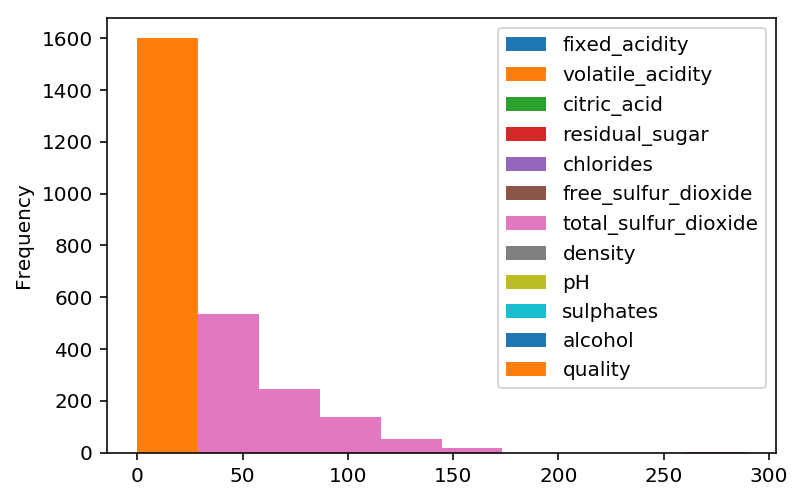

In [6]:
wine_df.plot.hist()

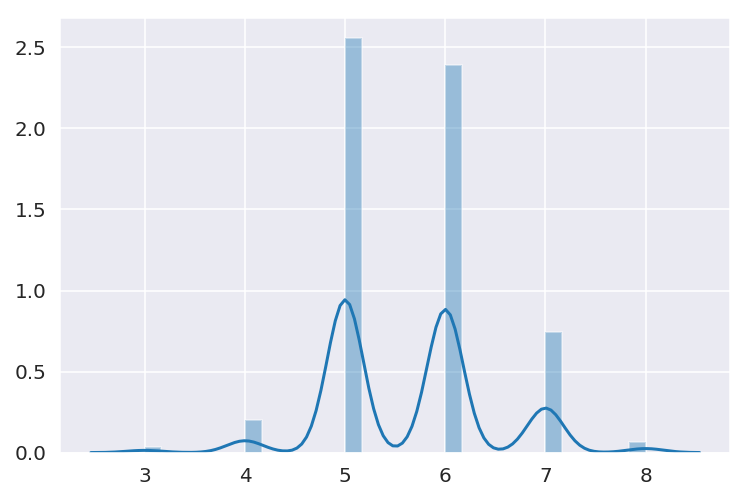

In [32]:
x=wine_df.quality.values
sns.distplot(x)

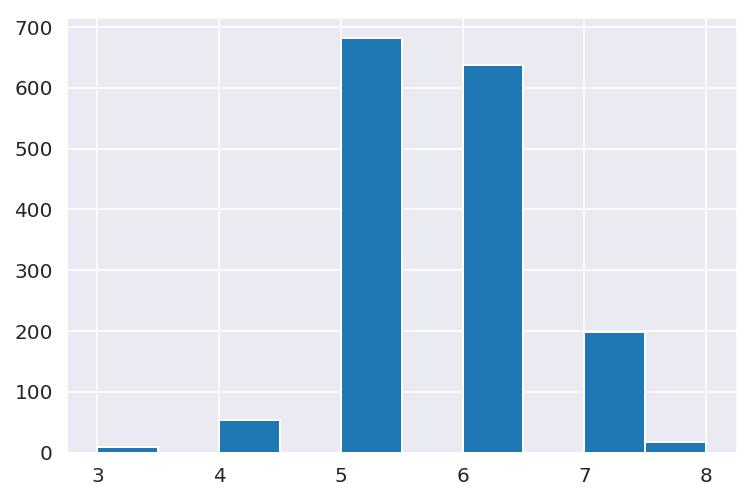

In [7]:
sns.set_style("darkgrid")
wine_df.quality.hist()

# Q6. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


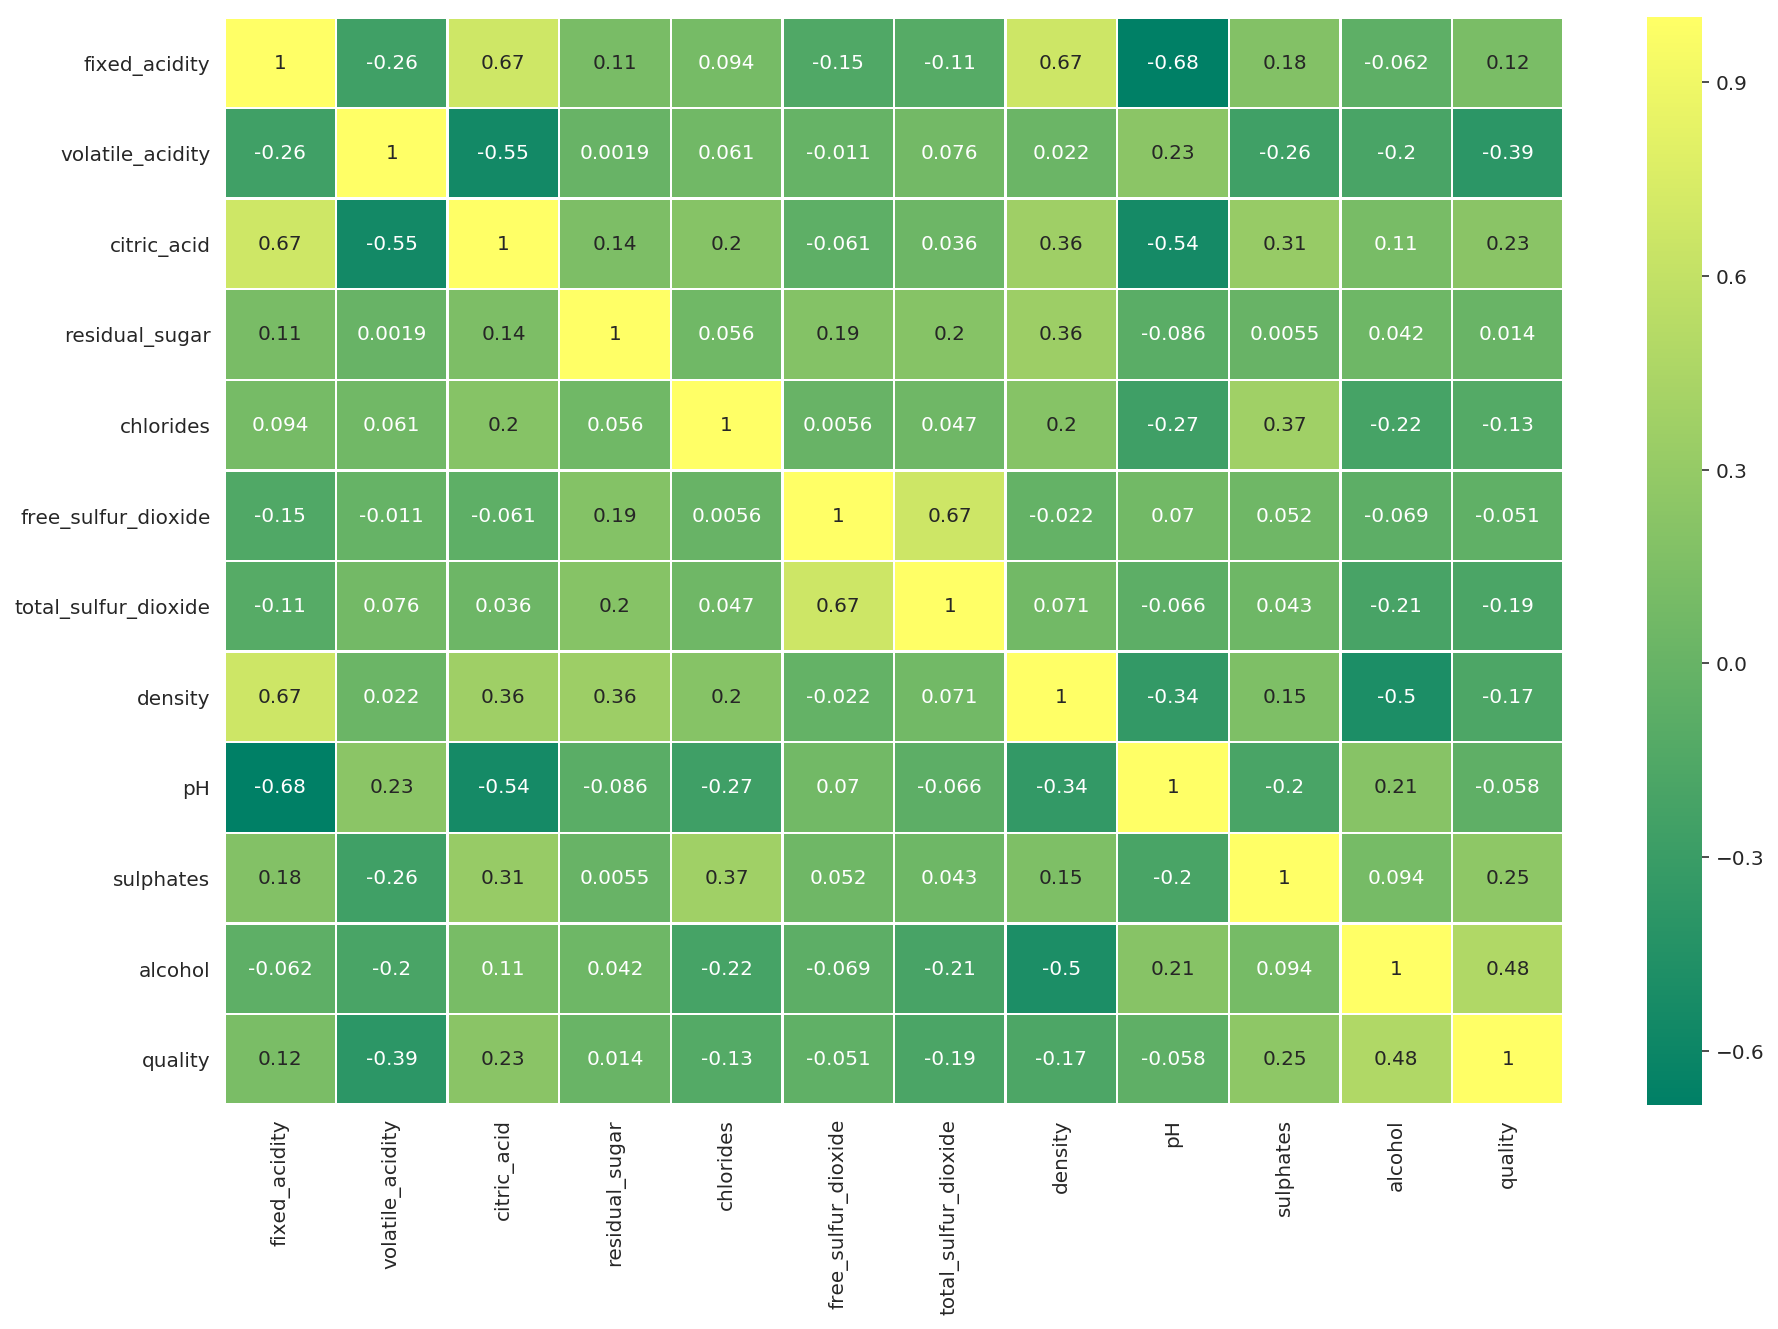

In [8]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(wine_df.corr(), annot=True, linewidths=.7, ax=ax,cmap="summer")

# Q7 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test) based on dependent and independent variables.



In [51]:
from sklearn.model_selection import train_test_split
array = wine_df.values
X = array[:,0:11] # select all rows and first 11 columns which are the attributes   X rep Independent
Y = array[:,-1]   # select all rows and the 12th column which is dependent variable
#X=wine_df.iloc[:,0:11]
#Y=wine_df.iloc[:,-1]
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# Q8 Create the decision tree model using “entropy” method of finding the split columns and fit it to training data.




In [52]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Q9 Print the accuracy of the model & print the confusion matrix 

In [53]:
print(dt_model.score(X_test , y_test))


0.6083333333333333


In [99]:
from sklearn import metrics
y_predict = dt_model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict))


[[  0   0   1   0   0   0]
 [  3   0  12   6   1   0]
 [  0   2 130  51   6   0]
 [  0   5  44 130  24   2]
 [  1   0   3  24  30   0]
 [  0   0   0   2   1   2]]


# Q10. Regularize the decision tree by limiting the max. depth of trees and print the accuracy.

In [29]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 100)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=100,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [30]:
print(dt_model.score(X_test , y_test))


0.6375


In [31]:
from sklearn import metrics
y_predict = dt_model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict))


[[  0   1   0   0   0   0]
 [  1   1   9   9   2   0]
 [  1   3 143  29  13   0]
 [  0   6  44 128  26   1]
 [  0   0   7  16  33   2]
 [  0   0   1   2   1   1]]


# Q11 Apply the Random forest model and print the accuracy of Random forest Model

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc = rfc.fit(X_train, y_train)


In [79]:
y_predict = rfc.predict(X_test)
print(rfc.score(X_test , y_test))


0.6729166666666667


# Q12 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [85]:
from sklearn.ensemble import AdaBoostClassifier
classifierAdab = AdaBoostClassifier(n_estimators=100,random_state = 0)
classifierAdab.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=0)

In [86]:
y_predAdab = classifierAdab.predict(X_test)
print(classifierAdab.score(X_test , y_test))

0.45416666666666666


# Q13 - Apply Bagging Classifier Algorithm and print the accuracy.

In [87]:
from sklearn.ensemble import BaggingClassifier
classifierBag = BaggingClassifier(n_estimators=100,random_state = 0)
classifierBag.fit(X_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=100, n_jobs=None, oob_score=False, random_state=0,
         verbose=0, warm_start=False)

In [90]:
y_predBag = classifierBag.predict(X_test)
print(classifierBag.score(X_test , y_test))

0.65625


# Q14 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [91]:
from sklearn.ensemble import GradientBoostingClassifier
classifierGbo = GradientBoostingClassifier(n_estimators=100,random_state = 0)
classifierGbo.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [92]:
y_predGbo = classifierGbo.predict(X_test)

In [93]:
print(classifierGbo.score(X_test , y_test))

0.65


# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.